# Local Search Implementation on Diagonal Magic Cube
## by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *
from genetic import *

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [1]:
goal_state = [

# Level 1
[
    [67,18,119,106,5],
    [116,17,14,73,95],
    [40,50,81,65,79],
    [56,120,55,49,35],
    [36,110,46,22,101]
],
# Level 2
[
    [66,72,27,102,48],
    [26,39,92,44,114],
    [32,93,88,83,19],
    [113,57,9,62,74],
    [78,54,99,24,60]
],
# Level 3
[
    [42,111,85,2,75],
    [30,118,21,123,23],
    [89,68,63,58,37],
    [103,3,105,8,96],
    [51,15,41,124,84]
],
# Level 4
[
    [115,98,4,1,97],
    [52,64,117,69,13],
    [107,43,38,33,94],
    [12,82,34,87,100],
    [29,28,122,125,11]
],
# Level 5
[
    [25,16,80,104,90],
    [91,77,71,6,70],
    [47,61,45,76,86],
    [31,53,112,109,10],
    [121,108,7,20,59]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 0.0


In [5]:
goal_cube.print_tensor()

Level 1: 

[ 67  18 119 106   5]
[116  17  14  73  95]
[40 50 81 65 79]
[ 56 120  55  49  35]
[ 36 110  46  22 101]

Level 2: 

[ 66  72  27 102  48]
[ 26  39  92  44 114]
[32 93 88 83 19]
[113  57   9  62  74]
[78 54 99 24 60]

Level 3: 

[ 42 111  85   2  75]
[ 30 118  21 123  23]
[89 68 63 58 37]
[103   3 105   8  96]
[ 51  15  41 124  84]

Level 4: 

[115  98   4   1  97]
[ 52  64 117  69  13]
[107  43  38  33  94]
[ 12  82  34  87 100]
[ 29  28 122 125  11]

Level 5: 

[ 25  16  80 104  90]
[91 77 71  6 70]
[47 61 45 76 86]
[ 31  53 112 109  10]
[121 108   7  20  59]



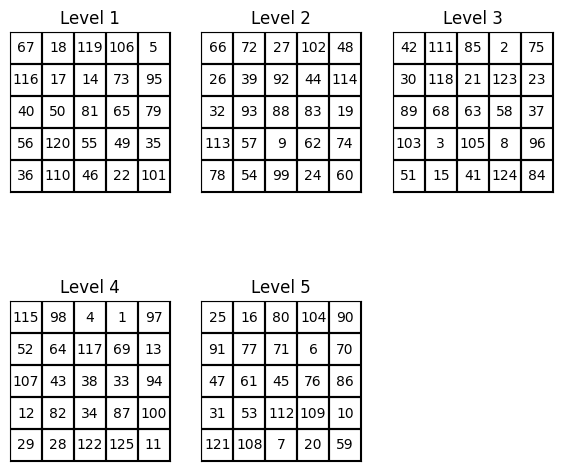

In [6]:
goal_cube.plot_cube()

### Problem Cube Initialization

In [2]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

## Local Seach Implementation

### Random Restart Hill-Climbing


In [ ]:
print(f"ideal objective function {obj_func_goal}")

In [ ]:
RR = Random_restart(cube=cube,max_restart=100)

In [ ]:
RR.results()

In [ ]:
# print(f"Random Restart Best Value: {RR.best_value}\n")
# print(f"Ideal Value: {obj_func_goal}\n")
# print(f"differences from ideal: {RR.best_value - obj_func_goal}")

In [ ]:
RR.hist_plot()

### Simulated Annealing

#### Initial State

In [3]:
SA_cube = copy.deepcopy(cube)

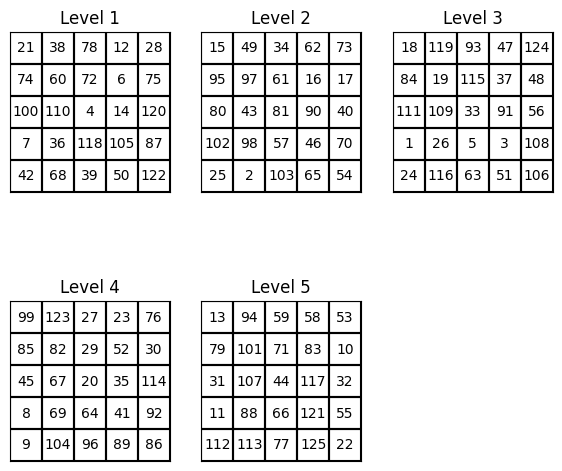

In [4]:
SA_cube.plot_cube()

In [6]:
print(f"intial objective function: {SA_cube.objective_function(square_error=True)}")

intial objective function: 685748.0


#### Searching

In [7]:
SA = Simulated(cube=SA_cube,tmax=500000,tmin=0,step_max=10000,cooling_schedule="quadratic",alpha=0.99,greedy_move=True,function_error='squared')

Initial Energy: 685748.0

Step:1,Neighbor's Energy: 613060.0, Best Energy: 685748.0, -de: 72688.0, Temperature: 500000, Probability: 1

Step:2,Neighbor's Energy: 584701.0, Best Energy: 613060.0, -de: 28359.0, Temperature: 251256.2814070352, Probability: 1

Step:3,Neighbor's Energy: 545277.0, Best Energy: 584701.0, -de: 39424.0, Temperature: 100806.45161290323, Probability: 1

Step:4,Neighbor's Energy: 495165.0, Best Energy: 545277.0, -de: 50112.0, Temperature: 50454.08678102926, Probability: 1

Step:5,Neighbor's Energy: 479474.0, Best Energy: 495165.0, -de: 15691.0, Temperature: 29691.21140142518, Probability: 1

Step:6,Neighbor's Energy: 477973.0, Best Energy: 479474.0, -de: 1501.0, Temperature: 19417.47572815534, Probability: 1

Step:7,Neighbor's Energy: 432169.0, Best Energy: 477973.0, -de: 45804.0, Temperature: 13646.288209606986, Probability: 1

Step:8,Neighbor's Energy: 415677.0, Best Energy: 432169.0, -de: 16492.0, Temperature: 10098.969905069684, Probability: 1

Step:9,Neighbor

#### Result

In [20]:
SA.results()

+------------------------ RESULTS -------------------------+

    cooling sched.: quadratic multiplicative
    initial temp: 10000
    final temp: 2.5255050630675313e-05
    final step: 20000

    initial energy: 5813.000

    final energy: 212.000
    energy differences: 5601.000

    frequency stuck: 19665
    ratio stuck: 0.98325

    runtime: 223.996 seconds

+-------------------------- END ---------------------------+


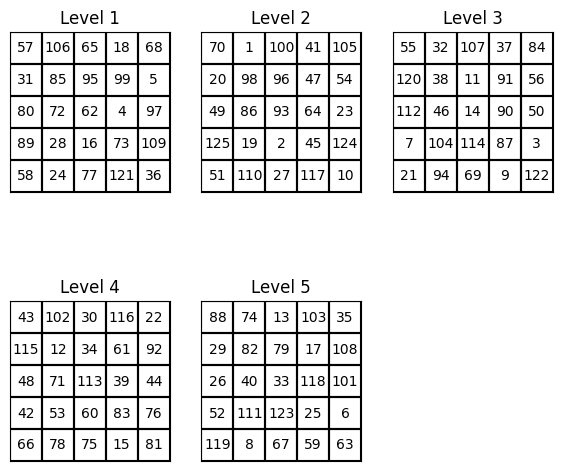

In [21]:
SA.final_state().plot_cube()

#### Plot

Best Energy 

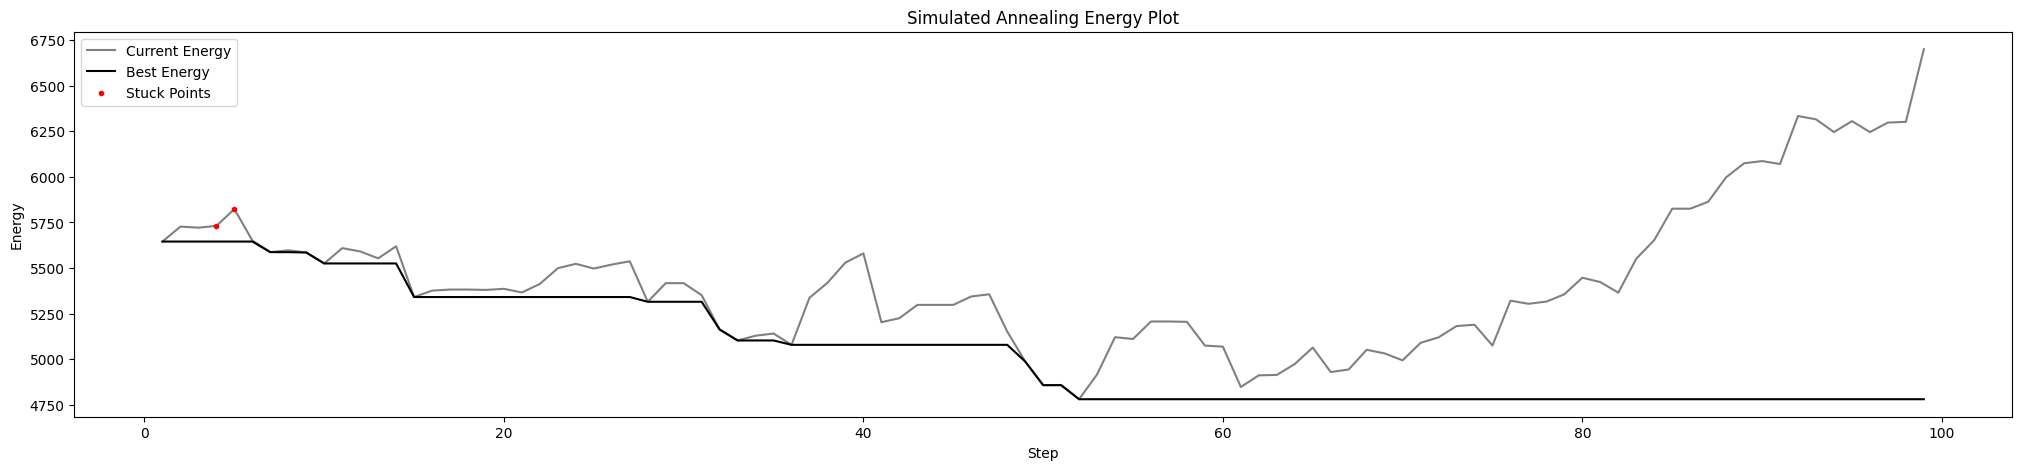

In [11]:
SA.hist_plot(Best_energy=True,Curr_energy=True,freq_stuck=True,title="Simulated Annealing Energy Plot")

Probability

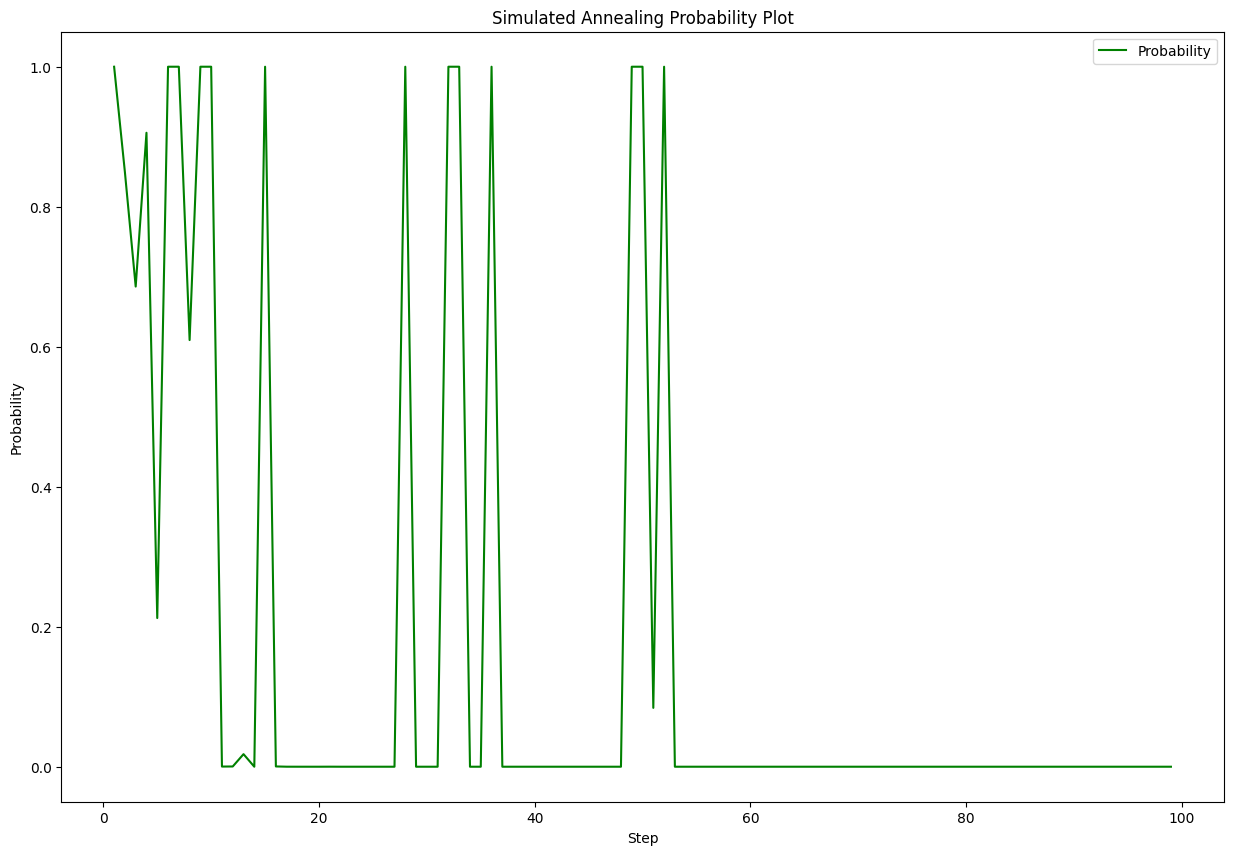

In [13]:
SA.prob_plot(title="Simulated Annealing Probability Plot")

### Genetic Algorithm(NJ)


In [17]:
GAcube = copy.deepcopy(cube)

In [ ]:
genetic_algo = GeneticAlgoNJ(
    cube=GAcube,
    population_size=500,
    generation_rate=300,
    mutation_rate=0.1,
    elitism_size=10
)

In [ ]:
genetic_algo.evolve()

In [ ]:
best_cube, best_fitness = genetic_algo.get_best_solution()

# Plot the fitness evolution over generations
genetic_algo.hist_plot()

print("\nBest Fitness:", best_fitness)